# Amazon Alexa Review

## 1) 리뷰 데이터 불러오기

### pandas 라이브러리 사용, 데이터 출처: https://www.kaggle.com/sid321axn/amazon-alexa-reviews

In [1]:
import pandas as pd
import numpy as np

In [2]:
review_data = pd.read_csv('amazon_alexa.tsv', delimiter='\t', encoding='utf-8')

In [3]:
review_data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
review_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## 2) 기초 데이터 시각화

### 2.1) Amazon Alexa에 대한 전반적인 평점

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
num_rating5 = review_data['rating'][review_data['rating']==5].count()
num_rating4 = review_data['rating'][review_data['rating']==4].count()
num_rating3 = review_data['rating'][review_data['rating']==3].count()
num_rating2 = review_data['rating'][review_data['rating']==2].count()
num_rating1 = review_data['rating'][review_data['rating']==1].count()

In [8]:
x = ['5','4','3','2','1']

In [9]:
ratio_rating = [num_rating5 / len(review_data['rating']), num_rating4 / len(review_data['rating']), num_rating3 / len(review_data['rating']), 
                num_rating2 / len(review_data['rating']), num_rating1 / len(review_data['rating'])]

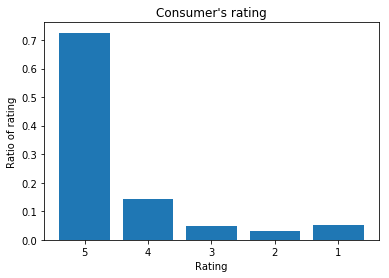

In [10]:
plt.bar(x, ratio_rating)
plt.title("Consumer's rating")
plt.xlabel("Rating")
plt.ylabel("Ratio of rating")
plt.show()

### 2.2) 품목별 피드백, 평점

In [11]:
var_rate = pd.pivot_table(review_data, index = ['variation'])
var_rate.head()

,feedback,rating
variation,,
Black,0.865900,4.233716
Black Dot,0.930233,4.453488
Black Plus,0.896296,4.370370
Black Show,0.932075,4.490566
Black Spot,0.867220,4.311203


#### 피드백, 평점이 최대인 품목

In [12]:
var_rate['feedback'].idxmax(), var_rate['rating'].idxmax()

('Oak Finish ', 'Walnut Finish ')

#### 피드백, 평점이 최저인 품목

In [31]:
var_rate['feedback'].idxmin(), var_rate['rating'].idxmin()

('White', 'White')

## 3) Google Cloud Platform을 이용한 sentimental analysis

### Natural Language API Client 사용

In [12]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [13]:
path = 'C:\\Users\jhpark\Documents\GitHub\Private-NLP\Taejun-1fa51108e2e7.json'  # FULL path to your service account key
client = language.LanguageServiceClient.from_service_account_json(path)

In [14]:
senti_score = list()
senti_mag = list()

In [15]:
for i in range(len(review_data['verified_reviews'])):
    text = review_data['verified_reviews'][i]
    document = types.Document(
        content = text,
        type    = enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    senti_score.append(sentiment.score)
    senti_mag.append(sentiment.magnitude)
    print('{} is completed'.format(i))

0 is completed
1 is completed
2 is completed
3 is completed
4 is completed
5 is completed
6 is completed
7 is completed
8 is completed
9 is completed
10 is completed
11 is completed
12 is completed
13 is completed
14 is completed
15 is completed
16 is completed
17 is completed
18 is completed
19 is completed
20 is completed
21 is completed
22 is completed
23 is completed
24 is completed
25 is completed
26 is completed
27 is completed
28 is completed
29 is completed
30 is completed
31 is completed
32 is completed
33 is completed
34 is completed
35 is completed
36 is completed
37 is completed
38 is completed
39 is completed
40 is completed
41 is completed
42 is completed
43 is completed
44 is completed
45 is completed
46 is completed
47 is completed
48 is completed
49 is completed
50 is completed
51 is completed
52 is completed
53 is completed
54 is completed
55 is completed
56 is completed
57 is completed
58 is completed
59 is completed
60 is completed
61 is completed
62 is completed
63

In [16]:
review_data['sentiment_score'] = senti_score

In [17]:
review_data['sentiment_magnitude'] = senti_mag

In [18]:
review_data.head()

,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.8,0.8
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.9,0.9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.1,1.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.7,2.3
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.1,0.1


In [19]:
review_data.to_csv('Amazon_review.csv')

## 4) 리뷰 감성분석 기반 데이터 분석

In [13]:
review = pd.read_csv('Amazon_review.csv')

In [14]:
review.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.8,0.8
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.9,0.9
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.1,1.0
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.7,2.3
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,0.1,0.1


In [15]:
review = review.drop('Unnamed: 0', axis=1)

### 4.1) 감성분석 점수가 음수(부정적)인 평균 평점 및 제품 종류

In [16]:
minus_review = review[review['sentiment_score'] < 0]
minus_review.head()

,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1,-0.4,0.9
41,5,30-Jul-18,Charcoal Fabric,My Android would not allow Alexa to connect. F...,1,-0.1,1.1
43,5,30-Jul-18,Charcoal Fabric,Tried to play certain broadway shows like Came...,1,-0.2,0.2
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappoi...,1,-0.7,1.5
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,-0.9,0.9


In [17]:
pd.pivot_table(minus_review, index=['variation'], values=['sentiment_score'], aggfunc=[np.mean, len], margins=False)

,mean,len
,sentiment_score,sentiment_score
variation,,
Black,-0.476087,46.0
Black Dot,-0.407692,52.0
Black Plus,-0.356410,39.0
Black Show,-0.448276,29.0
Black Spot,-0.346875,32.0
Charcoal Fabric,-0.383333,24.0
Configuration: Fire TV Stick,-0.452941,34.0
Heather Gray Fabric,-0.440000,10.0


In [18]:
minus_review.groupby(['variation'])['sentiment_score'].count().sort_values(ascending=False)

variation
Black  Dot                      52
Black                           46
Black  Plus                     39
Configuration: Fire TV Stick    34
Black  Spot                     32
Black  Show                     29
White  Dot                      24
Charcoal Fabric                 24
White                           14
White  Spot                     12
White  Show                     12
White  Plus                     12
Heather Gray Fabric             10
Sandstone Fabric                 8
Name: sentiment_score, dtype: int64

### 4.2) 감성분석 점수가 양수(긍정적)인 평균 평점 및 제품 종류

In [19]:
plus_review = review[review['sentiment_score'] > 0]
plus_review.head()

,rating,date,variation,verified_reviews,feedback,sentiment_score,sentiment_magnitude
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.8,0.8
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.9,0.9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.1,1.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.7,2.3
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.1,0.1


In [20]:
pd.pivot_table(plus_review, index=['variation'], values=['sentiment_score'], aggfunc=[np.mean, len], margins=False)

,mean,len
,sentiment_score,sentiment_score
variation,,
Black,0.655612,196.0
Black Dot,0.685468,406.0
Black Plus,0.663942,208.0
Black Show,0.637500,216.0
Black Spot,0.627749,191.0
Charcoal Fabric,0.679737,380.0
Configuration: Fire TV Stick,0.683276,293.0
Heather Gray Fabric,0.715603,141.0


In [21]:
plus_review.groupby(['variation'])['sentiment_score'].count().sort_values(ascending=False)

variation
Black  Dot                      406
Charcoal Fabric                 380
Configuration: Fire TV Stick    293
Black  Show                     216
Black  Plus                     208
Black                           196
Black  Spot                     191
White  Dot                      146
Heather Gray Fabric             141
White  Spot                      88
Sandstone Fabric                 74
White                            70
White  Show                      65
White  Plus                      60
Oak Finish                       14
Walnut Finish                     9
Name: sentiment_score, dtype: int64

### 4.3) 감성분석과 평점, 피드백 사이의 상관관계

#### Feature들 사이의 상관관계

In [22]:
import seaborn as sns
from scipy.stats import pearsonr

In [23]:
corr = pd.DataFrame()

In [24]:
corr['rating'] = review['rating']
corr['feedback'] = review['feedback']
corr['sentiment_score'] = review['sentiment_score']
corr['sentiment_magnitude'] = review['sentiment_magnitude']
corr.head()

,rating,feedback,sentiment_score,sentiment_magnitude
0,5,1,0.8,0.8
1,5,1,0.9,0.9
2,4,1,0.1,1.0
3,5,1,0.7,2.3
4,5,1,0.1,0.1


In [25]:
corr.corr()

,rating,feedback,sentiment_score,sentiment_magnitude
rating,1.000000,0.861968,0.675788,-0.030152
feedback,0.861968,1.000000,0.575241,-0.040800
sentiment_score,0.675788,0.575241,1.000000,-0.005955
sentiment_magnitude,-0.030152,-0.040800,-0.005955,1.000000


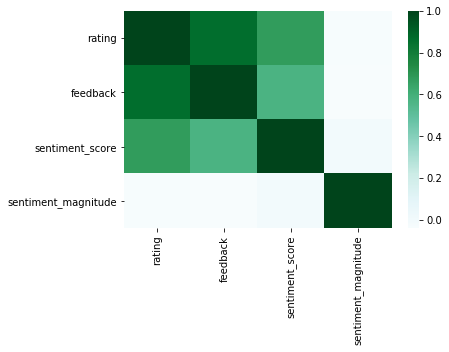

In [26]:
plt.figure() 
sns.heatmap(corr.corr(), cmap='BuGn')

#### Correlation의 p-value 값

In [27]:
cols = corr.columns
mat = corr.values
arr = np.zeros((len(cols),len(cols)), dtype=object)

In [28]:
for xi, x in enumerate(mat.T):
    for yi, y in enumerate(mat.T[xi:]):
        arr[xi, yi+xi] = pearsonr(x,y)[1]
        arr[yi+xi, xi] = arr[xi, yi+xi]

In [29]:
p_value = pd.DataFrame(arr, index=cols, columns=cols)

In [30]:
p_value

,rating,feedback,sentiment_score,sentiment_magnitude
rating,0,0,0,0.0906451
feedback,0,0,5.16296e-277,0.0220246
sentiment_score,0,5.16296e-277,0,0.738326
sentiment_magnitude,0.0906451,0.0220246,0.738326,0
